# Explore Classifiers on Our Dataset & Evaluate Their Performance

In [1]:
import pandas as pd
import numpy as np
import joblib
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDClassifier

In [2]:
X_train_1 = joblib.load('X_train_1.pkl')
X_test_1 = joblib.load('X_test_1.pkl')
Y_train = joblib.load('Y_train.pkl')
Y_test = joblib.load('Y_test.pkl')

# Classification-Based Machine Learning Algorithms

    1. Naive Bayes
    2. Logistic Regression
    3. SVM 
    4. Decision Tree
    5. Random Forest
    6. GBDT / XGBoost

In [3]:
def confusion_matrix_func(Y_test, y_test_pred):
    '''
    This function plots the confusion matrix heatmap using the actual and predicted values.
    '''
    C = confusion_matrix(Y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['back', 'butter_overflow', 'loadmodule', 'guess_passwd', 'imap', 'ipsweep', 'warezmaster', 'rootkit', 
              'multihop', 'neptune', 'nmap', 'normal', 'phf', 'perl', 'pod', 'portsweep', 'ftp_write', 'satan', 'smurf',
              'teardrop', 'warezclient', 'land']
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    
    plt.show()

In [4]:
def model(model_name, X_train, Y_train, X_test, Y_test):
    
    '''
    This function computes the performance scores on the train and test data.
    '''
    
    print('Fitting the model and prediction on train data:')
    start = dt.datetime.now()
    model_name.fit(X_train, Y_train)
    y_tr_pred = model_name.predict(X_train)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start)
    print('='*50)
    
    results_tr = dict()
    y_tr_pred = model_name.predict(X_train)    
    results_tr['precision'] = precision_score(Y_train, y_tr_pred, average='weighted')
    results_tr['recall'] = recall_score(Y_train, y_tr_pred, average='weighted')
    results_tr['f1_score'] = f1_score(Y_train, y_tr_pred, average='weighted')
    
    results_test = dict()
    print('Prediction on test data:')
    start = dt.datetime.now()
    y_test_pred = model_name.predict(X_test)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start)
    print('='*50)
    
    print('Performance metrics:')
    print('='*50)
    print('Confusion Matrix is:')
    confusion_matrix_func(Y_test, y_test_pred)
    print('='*50)
    results_test['precision'] = precision_score(Y_test, y_test_pred, average='weighted')
    print('Precision score is:')
    print(precision_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    results_test['recall'] = recall_score(Y_test, y_test_pred, average='weighted')
    print('Recall score is:')
    print(recall_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    results_test['f1_score'] = f1_score(Y_test, y_test_pred, average='weighted')
    print('F1-score is:')
    print(f1_score(Y_test, y_test_pred, average='weighted'))
    # add the trained  model to the results
    results_test['model'] = model
    
    return results_tr, results_test

In [5]:
def print_grid_search_attributes(model):
    
    '''
    This function prints all the grid search attributes
    '''
    
    print('---------------------------')
    print('|      Best Estimator     |')
    print('---------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('---------------------------')
    print('|     Best parameters     |')
    print('---------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('----------------------------------')
    print('|   No of CrossValidation sets   |')
    print('----------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('---------------------------')
    print('|        Best Score       |')
    print('---------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

In [6]:
def tpr_fpr_func(Y_tr, Y_pred):
    '''
    This function computes the TPR and FPR scores using the actual and predicetd values
    '''
    results = dict()
    Y_tr = Y_tr.to_list()
    tp = 0; fp = 0; positives = 0; negatives = 0; length = len(Y_tr)
    for i in range(len(Y_tr)):
        if Y_tr[i]=='normal.':
            positives += 1
        else:
            negatives += 1
            
    for i in range(len(Y_pred)):
        if Y_tr[i]=='normal.' and Y_pred[i]=='normal.':
            tp += 1
        elif Y_tr[i]!='normal.' and Y_pred[i]=='normal.':
            fp += 1
            
    tpr = tp/positives
    fpr = fp/negatives
    
    results['tp'] = tp; results['tpr'] = tpr; results['fp'] = fp; results['fpr'] = fpr
    
    return results
    

# Random Forest

In [7]:
hyperparameter = {'max_depth':[5, 10, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 500],
                  'min_samples_split':[5, 10, 100, 500]}

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini',class_weight='balanced')
rf_grid = GridSearchCV(rf, param_grid=hyperparameter, cv=3, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 3 folds for each of 100 candidates, totalling 300 fits


/home/iti/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Completed
Time taken: 0:18:36.645799
Prediction on test data:
Completed
Time taken: 0:00:03.285634
Performance metrics:
Confusion Matrix is:


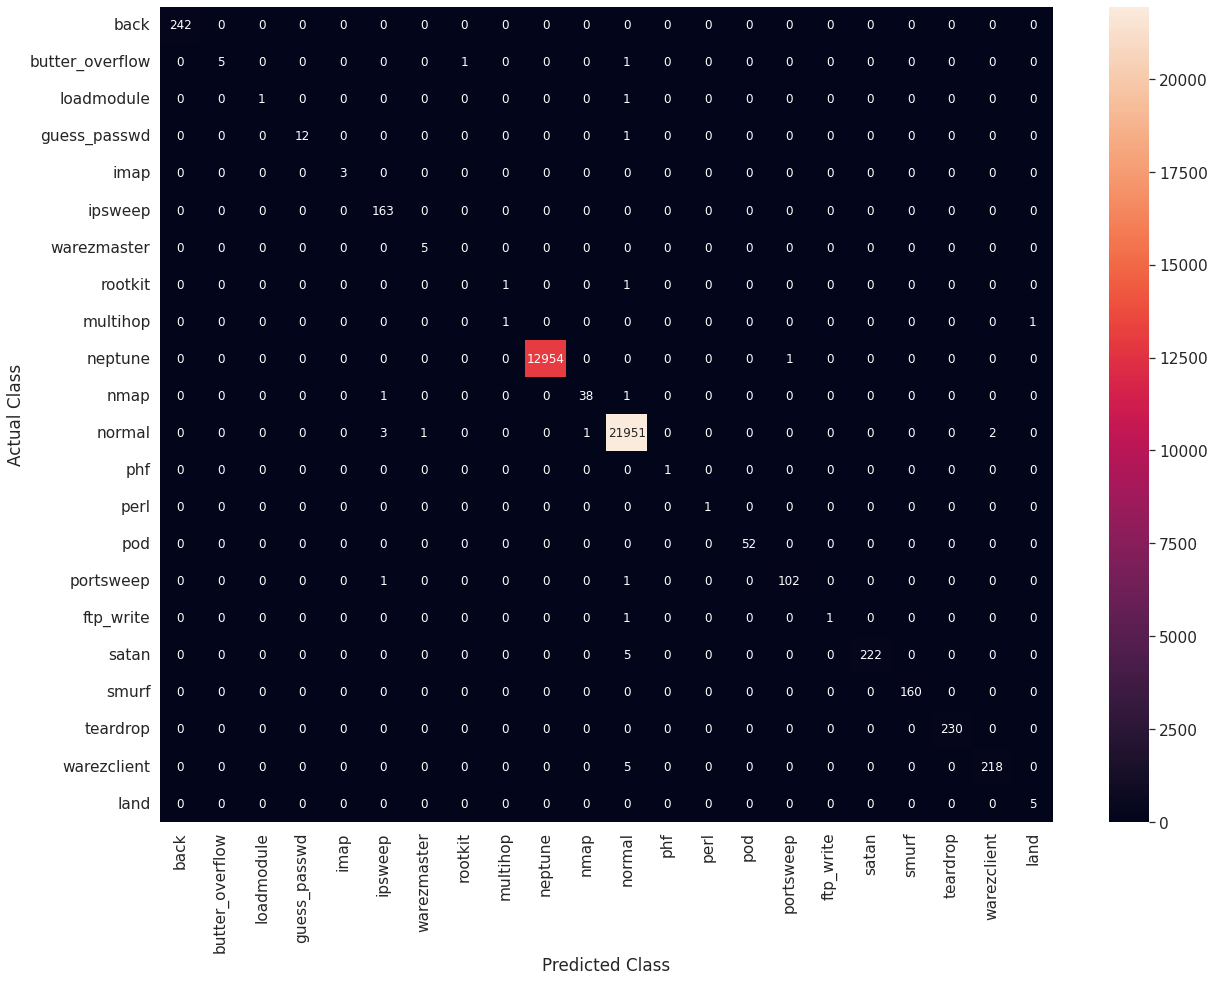

Precision score is:
0.99916002030099
Recall score is:
0.9991757562436464
F1-score is:
0.9991492048964595


In [8]:
rf_grid_results_tr, rf_grid_results_test = model(rf_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)

In [9]:
print_grid_search_attributes(rf_grid)

---------------------------
|      Best Estimator     |
---------------------------

	RandomForestClassifier(class_weight='balanced', max_depth=1000,
                       min_samples_split=10, n_estimators=500)

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'max_depth': 1000, 'min_samples_split': 10, 'n_estimators': 500}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 3

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

	0.999074998229367



In [10]:
rf_gs = rf_grid.best_estimator_
y_tr_pred = rf_gs.predict(X_train_1.toarray())
y_test_pred = rf_gs.predict(X_test_1.toarray())
rf_tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
rf_tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

In [11]:
rf_grid_results_tr

{'precision': 0.9998787014672628,
 'recall': 0.9998717819560579,
 'f1_score': 0.9998736418331332}

In [12]:
rf_tpr_fpr_train

{'tp': 65860, 'tpr': 0.9997874730546195, 'fp': 0, 'fpr': 0.0}

In [13]:
rf_grid_results_test

{'precision': 0.99916002030099,
 'recall': 0.9991757562436464,
 'f1_score': 0.9991492048964595,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>}

In [14]:
rf_tpr_fpr_test

{'tp': 21951,
 'tpr': 0.9996812095819292,
 'fp': 17,
 'fpr': 0.0011773668536602258}

In [15]:
joblib.dump(rf_grid.best_estimator_, 'rf_gs.pkl')

['rf_gs.pkl']

# Observations from applying Random Forest Classifier

- The RF Classifier was able to classify the Normal connection points with the highest f1_score compared to all of the above classifiers with 99.91%
        

- But this classifier was still unable to correctly classify bad connection classes like loadmodule, rootkit and ftp_write.


- True Postives = 21951


- TPR = 0.99968


- False Positives = 17


- FPR = 0.001177


- The RF Classifier has a higher FPR compared to the DT model.


- As the train and test metrics like f1-score, tpr and fpr are almost similar, the model is NOT OVERFITTING.

        

# Overal All Observations


- The RF Classifier and DT Classifier has the lowest TPR and FPR


- A common pattern shown by all of the classifiers is that classes rootkit, ftp_write and loadmodule were misclassified as class Normal by most of the classifiers.
        

- We will add more features in our dataset and try to improve the classifier performance.
    

- As DT & RF had the best performance, we will use these 3 classifiers ahead on the existing + feature engineered data.